In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv('ads_data.csv', sep = ',',parse_dates=['date'])
clients_data = pd.read_csv('ads_clients_data.csv', sep = ',',parse_dates=['date','create_date'])

In [134]:
data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [135]:
clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [84]:
data[data.event == 'view']

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999993,2019-04-05,2019-04-05 20:59:52,view,ios,112583,111818,112260,CPM,210.1,0,22392
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [85]:
data[data.event == 'click']

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
175,2019-04-01,2019-04-01 00:14:53,click,android,4933,37,4405,CPC,47.3,0,45763
208,2019-04-01,2019-04-01 00:17:08,click,ios,120536,120417,120519,CPC,49.4,0,30583
210,2019-04-01,2019-04-01 00:18:06,click,android,120536,120417,120519,CPC,49.4,0,30583
314,2019-04-01,2019-04-01 00:30:47,click,web,16589,747,16588,CPM,212.7,0,109
328,2019-04-01,2019-04-01 00:31:00,click,ios,122004,122004,122004,CPM,192.0,0,10570
...,...,...,...,...,...,...,...,...,...,...,...
999975,2019-04-05,2019-04-05 20:59:52,click,android,112583,111818,112260,CPM,210.1,0,22392
999976,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999989,2019-04-05,2019-04-05 20:59:52,click,android,112583,111818,112260,CPM,210.1,0,22392
999994,2019-04-05,2019-04-05 20:59:52,click,ios,112583,111818,112260,CPM,210.1,0,22392


In [97]:
pivot_add = data.groupby(['event','ad_id'], as_index = False) \
    .agg({'date' : 'count' }) \
    .pivot(index = 'ad_id', columns = 'event', values = 'date') \
    .rename(columns = { 'date' : 'count_event'}) \
    .fillna(0)

In [98]:
pivot_add

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [106]:
pivot_add.drop(pivot_add.query('view == 0').index, inplace=True)

In [107]:
pivot_add['share'] = np.log(pivot_add.view)

In [108]:
pivot_add.head()

event,click,view,share
ad_id,,,
2,1.0,101.0,4.615121
3,3.0,184.0,5.214936
1902,1.0,41.0,3.713572
2064,0.0,35.0,3.555348
2132,1.0,58.0,4.060443


C:\Users\Ilya-\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='share', ylabel='Density'>

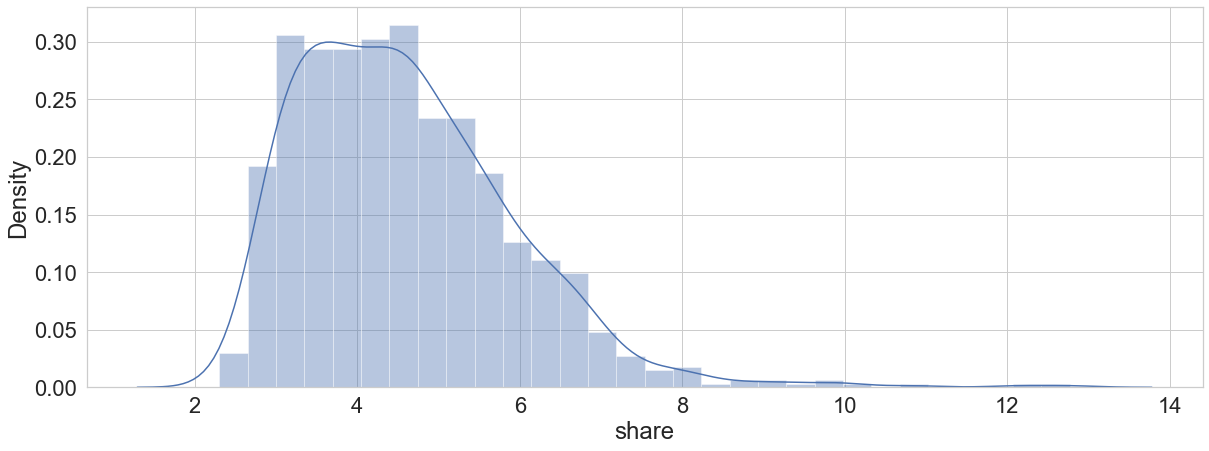

In [109]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
sns.distplot(pivot_add.share)

In [33]:
round(pivot_add.view.mean(),3)

923.132

In [31]:
round(pivot_add.click.mean(),3)

113.138

In [117]:
# среднее количество всех объявлений в день в разбивке по объявлениям
mean_day_add = data.query("event == 'view'").groupby(['date','ad_id'], as_index = False) \
    .agg({'event' : 'count' }) \
    .rename(columns = { 'event' : 'count_view'}) \
    .fillna(0) \
    .groupby(['date']) \
    .agg({'count_view' : 'mean' })
round(mean_day_add.count_view.rolling(2).mean().loc['2019-04-06'],0)

598.0

<AxesSubplot:xlabel='date'>

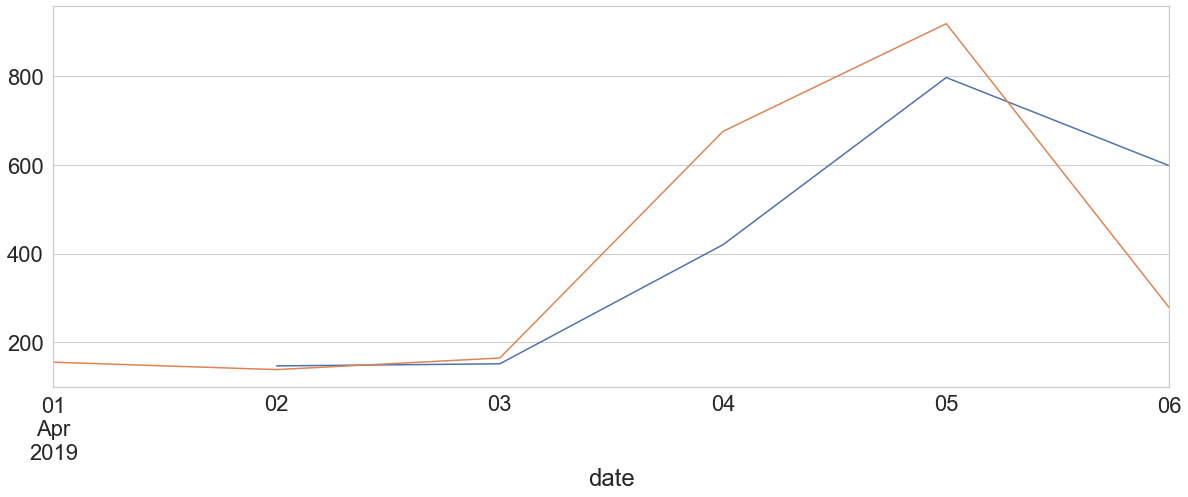

In [121]:
mean_day_add.count_view.rolling(2).mean().plot()
mean_day_add.count_view.plot()

In [123]:
abs(mean_day_add.count_view - mean_day_add.count_view.rolling(2).mean())

date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
Name: count_view, dtype: float64

In [ ]:
#Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней 
#от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

#В качестве ответа укажите среднее число дней.

In [142]:
df = data.merge(clients_data, on = 'client_union_id').dropna(0)

In [143]:
df.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [166]:
df['difference'] = df.date_x - df.create_date

In [168]:
df.groupby(['client_union_id'], as_index = False) \
    .agg({'difference' : 'min'}).mean()

client_union_id                   47921.434368
difference         124 days 09:04:43.532219570
dtype: object

In [169]:
df.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,difference
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [194]:
alll = clients_data.shape[0]

In [206]:
df1 = df.groupby(['client_union_id'], as_index = False) \
    .agg({'difference' : 'min'})

In [195]:
tr = df.groupby(['client_union_id'], as_index = False) \
    .agg({'difference' : 'min'}).count()[0]

In [198]:
round(100*tr/alll,2)

0.69

In [201]:
tr

838

In [207]:
(df1.difference <=pd.Timedelta(30, unit='day')).sum()

11

In [215]:
df1['difference_categorical'] = pd.cut(df1.difference, 
                                  bins = [pd.Timedelta(0, unit='day'), 
                                          pd.Timedelta(30, unit='day'), 
                                          pd.Timedelta(90, unit='day'),
                                          pd.Timedelta(180, unit='day'),
                                          pd.Timedelta(365, unit='day')], 
                                  labels = ['от 0 до 30' , 
                                            'от 30 до 90', 
                                            'от 90 до 180', 
                                            'от 180 до 365'])

In [222]:
df1.query("difference_categorical == 'от 90 до 180'")

,client_union_id,difference,difference_categorical
0,1,98 days,от 90 до 180
1,9,114 days,от 90 до 180
3,16,105 days,от 90 до 180
5,25,97 days,от 90 до 180
6,36,178 days,от 90 до 180
...,...,...,...
826,121765,138 days,от 90 до 180
827,121818,143 days,от 90 до 180
834,122013,151 days,от 90 до 180
835,122023,126 days,от 90 до 180


<AxesSubplot:xlabel='difference_categorical'>

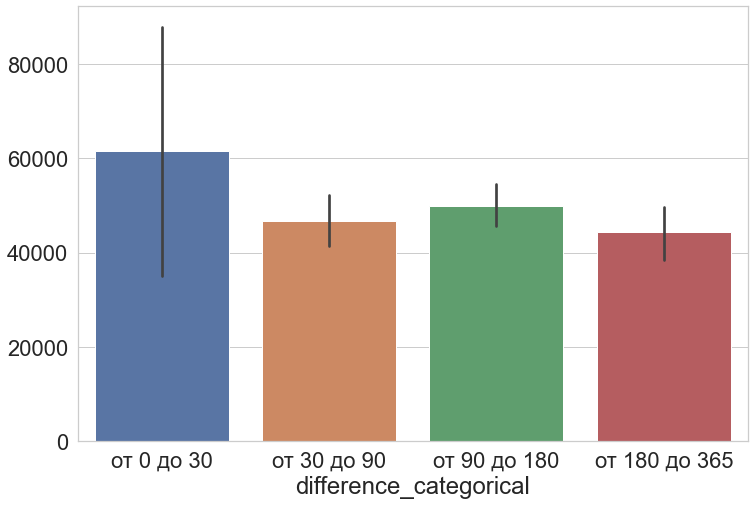

In [224]:
plt.figure(figsize=(12, 8))
sns.barplot(x = df1.difference_categorical, y = df1.client_union_id.unique())

In [227]:
df1.groupby(['difference_categorical'], as_index = False) \
    .agg({'client_union_id' : pd.Series.nunique})

,difference_categorical,client_union_id
0,от 0 до 30,11
1,от 30 до 90,263
2,от 90 до 180,396
3,от 180 до 365,168
